In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv(r'C:/Users/Victo/Downloads/rfm_data.csv')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [39]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [40]:
df.describe

<bound method NDFrame.describe of      CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0          8814   2023-04-11             943.31          Product C   890075   
1          2188   2023-04-11             463.70          Product A   176819   
2          4608   2023-04-11              80.28          Product A   340062   
3          2559   2023-04-11             221.29          Product A   239145   
4          9482   2023-04-11             739.56          Product A   194545   
..          ...          ...                ...                ...      ...   
995        2970   2023-06-10             759.62          Product B   275284   
996        6669   2023-06-10             941.50          Product C   987025   
997        8836   2023-06-10             545.36          Product C   512842   
998        1440   2023-06-10             729.94          Product B   559753   
999        4759   2023-06-10             804.28          Product D   467544   

     Location  
0

In [41]:
df.dtypes

CustomerID              int64
PurchaseDate           object
TransactionAmount     float64
ProductInformation     object
OrderID                 int64
Location               object
dtype: object

In [42]:
df.shape

(1000, 6)

In [43]:
df.drop(['CustomerID', 'OrderID'], axis =1, inplace = True )

In [44]:
df

,PurchaseDate,TransactionAmount,ProductInformation,Location
0,2023-04-11,943.31,Product C,Tokyo
1,2023-04-11,463.70,Product A,London
2,2023-04-11,80.28,Product A,New York
3,2023-04-11,221.29,Product A,London
4,2023-04-11,739.56,Product A,Paris
...,...,...,...,...
995,2023-06-10,759.62,Product B,London
996,2023-06-10,941.50,Product C,New York
997,2023-06-10,545.36,Product C,London
998,2023-06-10,729.94,Product B,Paris


AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

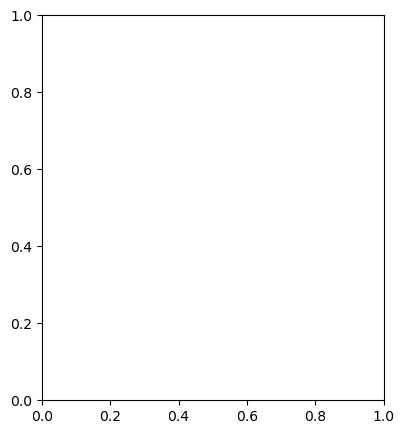

In [45]:
plt.figure(1, figsize = (15,5))
n = 0
for x in ['TransactionAmount']:
    n +=1
    plt.subplot(1, 3, n)
    plt.subplot_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

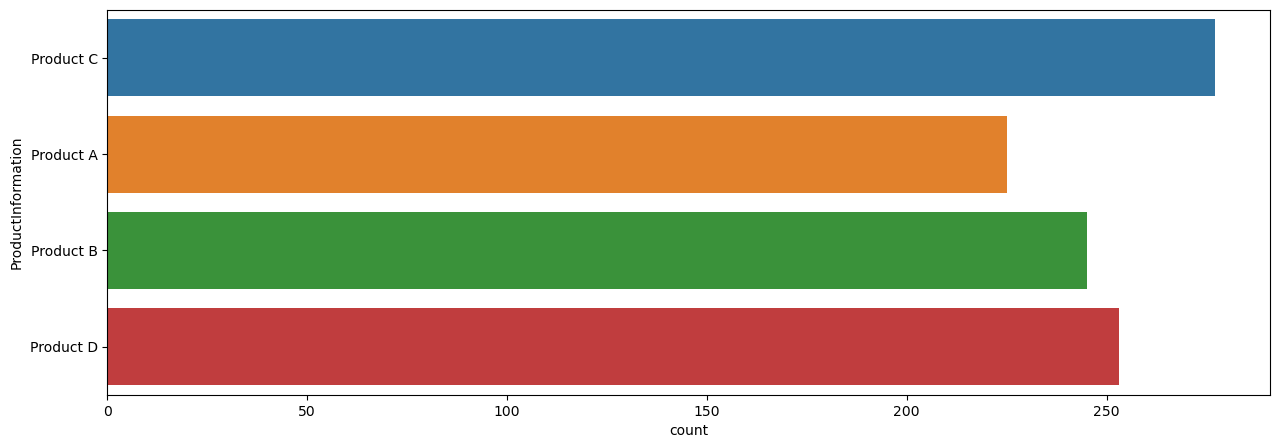

In [46]:
plt.figure(figsize = (15,5))
sns.countplot(y = 'ProductInformation', data = df)
plt.show()

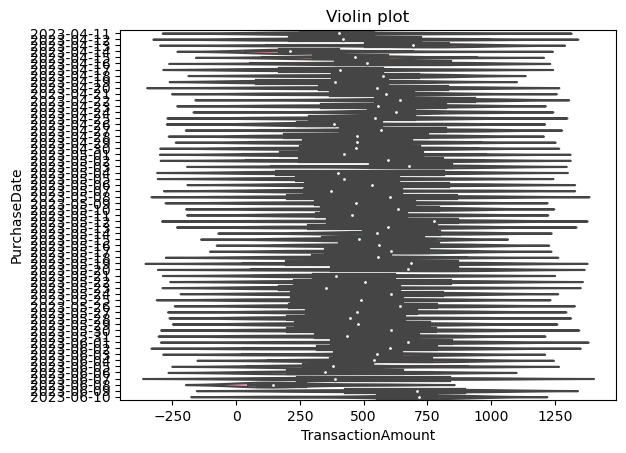

In [47]:
for cols in ['TransactionAmount']:
    sns.violinplot(x = cols, y = 'PurchaseDate', data = df)
#     plt.figure(figsize = (20,9))
    plt.ylabel('PurchaseDate' if n==1 else '')
    plt.title('Violin plot')
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'bool':
        print(f"Column '{col}' is boolean and will be converted to binary using LabelEncoder.")
        
        # Fit and transform the LabelEncoder on the column
        df[col] = le.fit_transform(df[col])

In [64]:
df.head()

,PurchaseDate,TransactionAmount,ProductInformation,Location
0,-1768030208,943.31,Product C,Tokyo
1,-1768030208,463.70,Product A,London
2,-1768030208,80.28,Product A,New York
3,-1768030208,221.29,Product A,London
4,-1768030208,739.56,Product A,Paris


In [61]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate']).astype('int64').astype(int)

x1= df.loc[:, ['TransactionAmount', 'PurchaseDate']].values

In [62]:
from sklearn.cluster import KMeans

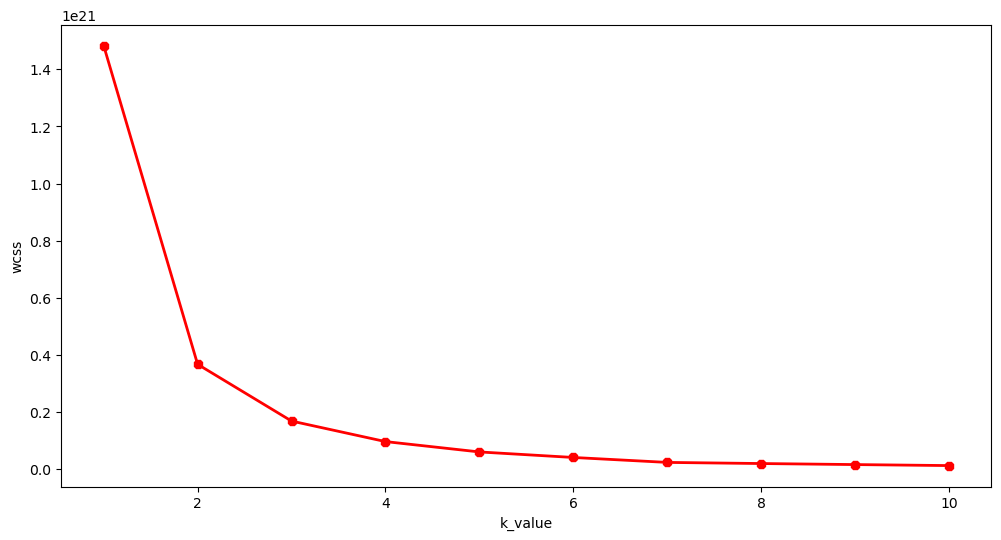

In [63]:
wcss = []
k_max = 10  # Maximum value of k you want to consider

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, k_max + 1), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('k_value')
plt.ylabel('wcss')
plt.show()


In [28]:
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(x1)
print(labels)

C:\Users\Victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 2 0 0 1 2 0 2 0 2 0 3 2 1 0 3 2 1 2 0 2 0 1 1 1 3 2 0 3 1 1 0 3 3 1 1 0
 0 1 3 3 2 3 3 1 3 1 3 3 0 0 3 0 0 0 0 0 0 0 2 0 1 0 2 2 0 0 1 1 1 2 1 0 1
 0 0 2 2 2 3 1 1 3 1 2 2 3 2 0 0 3 2 3 2 2 1 0 3 0 3 2 0 2 1 0 2 0 2 3 3 2
 0 0 2 1 2 3 1 2 2 0 0 3 0 1 1 2 1 1 3 0 0 0 0 0 1 1 0 0 1 2 1 2 2 2 2 3 0
 3 3 1 2 0 2 1 3 1 2 1 2 0 2 1 0 1 3 0 1 1 0 3 1 2 1 2 3 3 1 2 3 3 0 1 1 3
 1 1 2 0 2 3 3 3 2 1 1 2 3 0 0 1 3 2 1 0 2 1 1 3 3 1 1 3 1 1 2 2 1 1 1 3 1
 2 3 0 1 1 2 0 0 1 0 3 0 2 1 1 3 3 3 2 2 3 0 0 1 3 2 0 0 2 0 2 2 2 0 0 2 3
 1 1 3 3 2 3 1 2 1 3 3 2 2 1 0 0 0 3 3 1 1 2 3 2 1 2 1 0 0 0 2 1 0 0 0 3 2
 1 1 3 0 1 2 2 0 2 1 3 0 3 1 2 1 1 1 2 0 3 2 0 0 3 1 0 3 2 1 0 2 1 0 1 2 3
 2 0 3 0 2 0 2 1 2 2 0 3 0 3 0 1 2 2 0 2 3 3 0 0 2 1 2 2 1 0 2 3 1 3 1 1 2
 3 3 1 3 3 0 1 1 3 0 2 0 0 0 3 3 3 3 3 0 1 1 1 0 2 1 1 0 1 3 0 0 3 0 1 2 0
 1 0 0 0 3 2 0 1 3 0 3 0 0 1 3 0 1 3 3 0 2 1 1 0 2 0 3 1 3 3 2 1 2 2 2 2 0
 0 0 3 0 2 3 2 0 1 2 3 1 1 2 3 3 0 2 3 0 3 1 2 0 3 0 0 0 2 1 2 2 3 2 2 2 3
 0 0 3 2 0 2 1 0 3 0 3 3 

In [30]:
print(kmeans.cluster_centers_)

[[145.35033582]
 [660.69079365]
 [409.56306122]
 [884.62506383]]


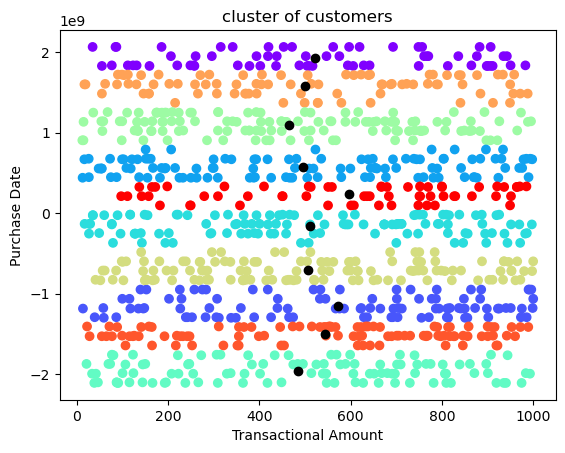

In [65]:
plt.scatter(x1[:,0], x1[:,-1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('cluster of customers')
plt.xlabel('Transactional Amount')
plt.ylabel('Purchase Date')
plt.show()